## Train data 변수 설명 

* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류
  * Commercial_associate 사업
  * Working 일
  * State servant 공무원
  * Pensioner 연금 수령자
  * Student 학생

* edu_type: 교육 수준

  * Higher education
  * Secondary / secondary special
  * Incomplete higher
  * Lower secondary
  * Academic degree

* family_type: 결혼 여부
  * Married 결혼
  * Civil marriage 자녀가 있는 결혼
  * Separated 이혼
  * Single / not married 싱글
  * Widow 한부모 가정
  
* house_type: 생활 방식
  * Municipal apartment
  * House / apartment
  * With parents
  * Co-op apartment
  * Rented apartment
  * Office apartment

* DAYS_BIRTH: 출생일

  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

* DAYS_EMPLOYED: 업무 시작일
  
  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
  
  양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부

* work_phone: 업무용 전화 소유 여부

* phone: 전화 소유 여부

* email: 이메일 소유 여부

* occyp_type: 직업 유형													

* family_size: 가족 규모

* begin_month: 신용카드 발급 월

  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=1)
sns.set_palette("pastel")

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv("/content/drive/MyDrive/DuSiData/credit_card/train.csv")

In [34]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [36]:
data.isnull().sum()/data.shape[0]*100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

> `occyp_type(직업유형)`의 결측치 30%

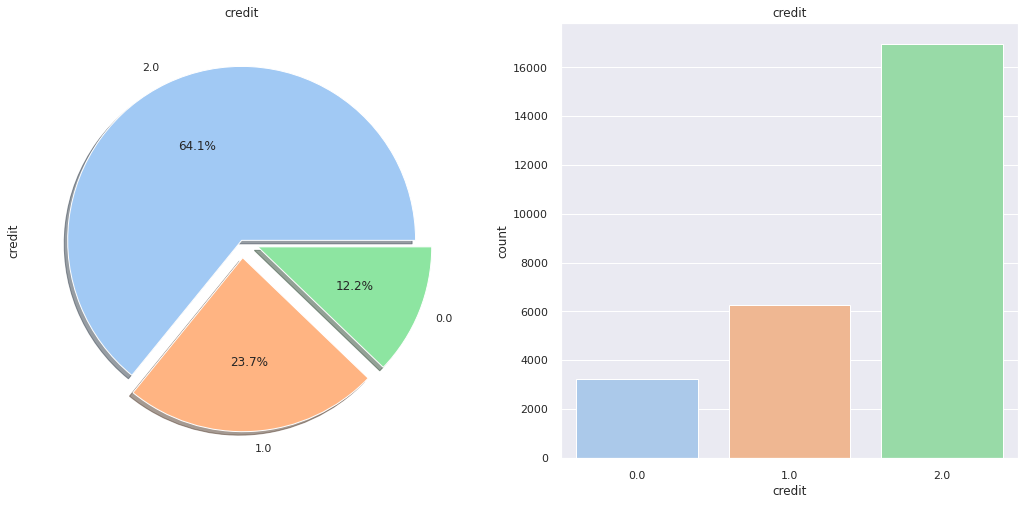

In [37]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=data,ax=ax[1])
ax[1].set_title('credit')
plt.show()

> `credit(신용등급)`은 낮을 수록 높은 신용카드 사용자를 의미하므로 신용등급이 2.0이 64.1%를 차지하는 것을 볼 수 있음


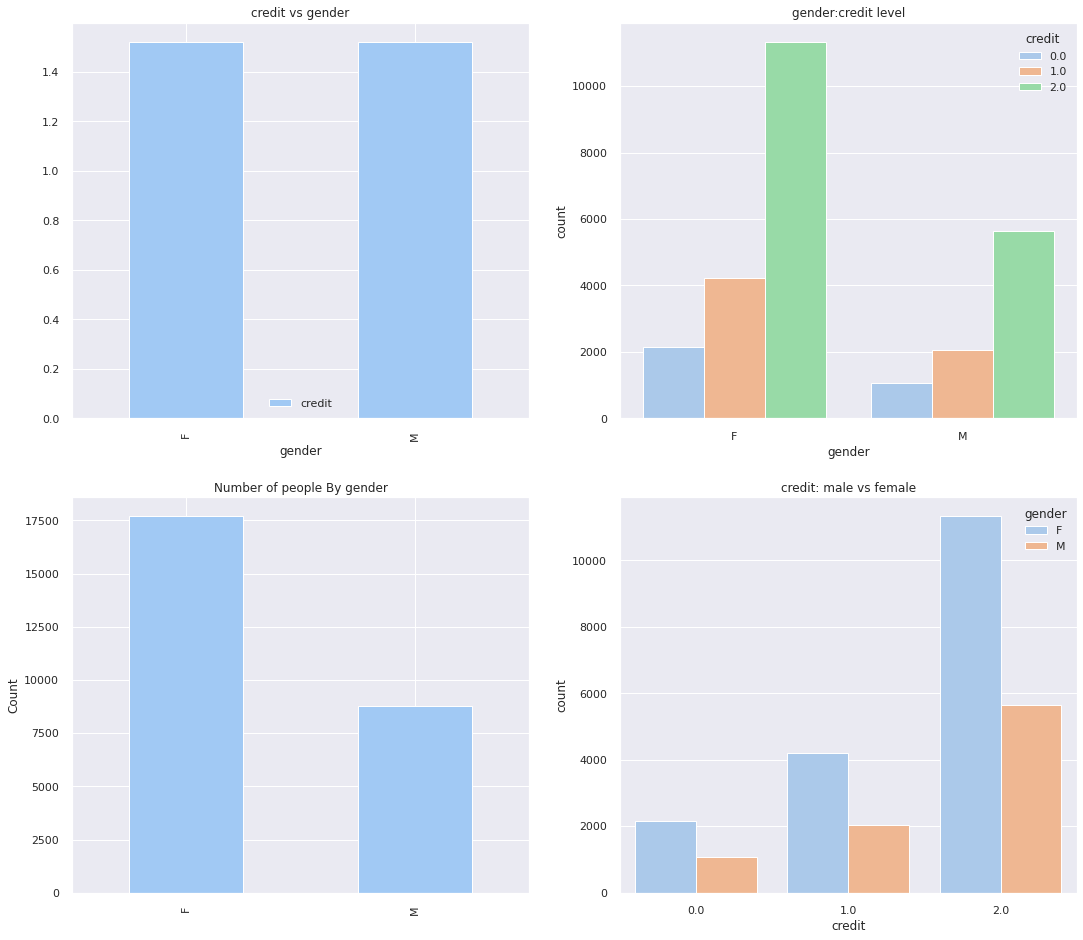

In [38]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs gender')
sns.countplot('gender',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('gender:credit level')

data['gender'].value_counts().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Number of people By gender')
ax[1,0].set_ylabel('Count')
sns.countplot('credit',hue='gender',data=data,ax=ax[1,1])
ax[1,1].set_title('credit: male vs female')
plt.show()

> 전체적인 데이터 비율에서 남성과 여성은 동일한 분포를 보임. 
>
> 여성의 데이터 수집량이 2배 더 많고 각 등급별 값도 2배 정도인 것을 볼 수 있음. 

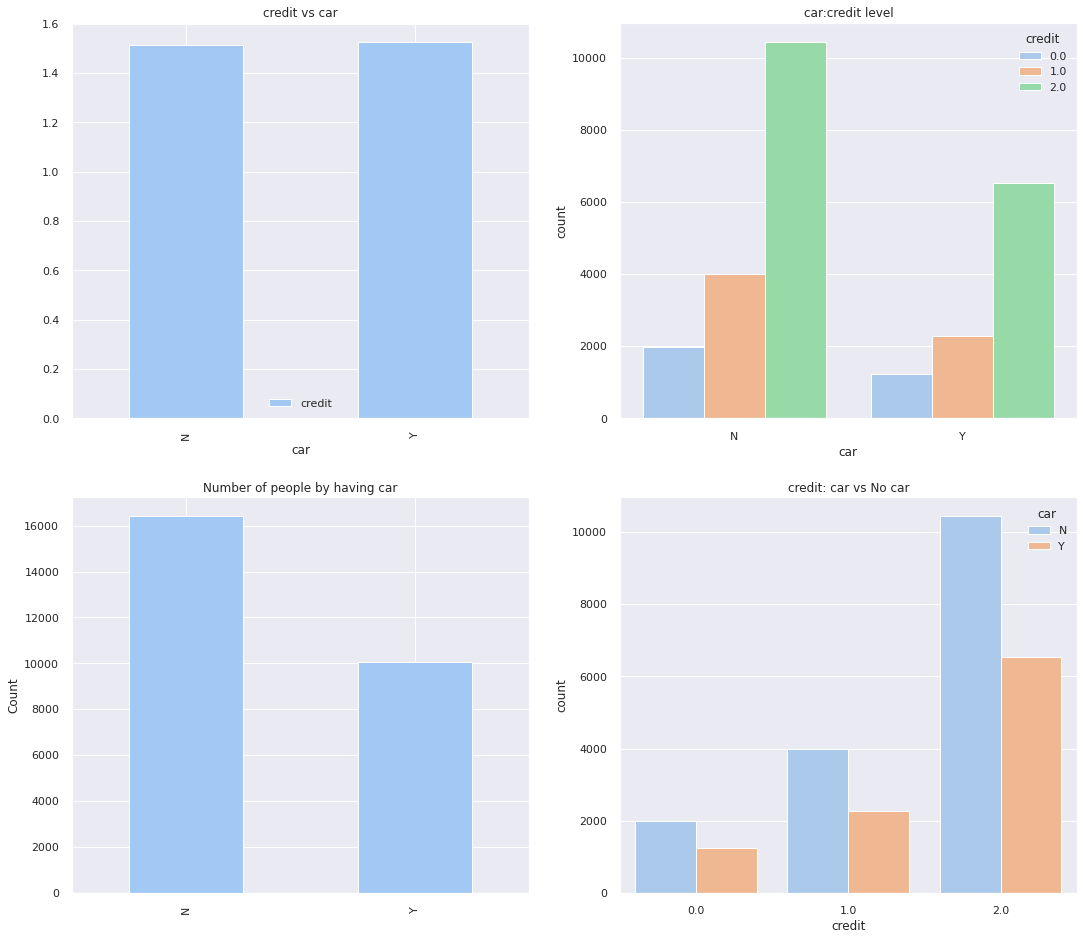

In [39]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('car:credit level')
data['car'].value_counts().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Number of people by having car')
ax[1, 0].set_ylabel('Count')
sns.countplot('credit',hue='car',data=data,ax=ax[1, 1])
ax[1, 1].set_title('credit: car vs No car')
plt.show()

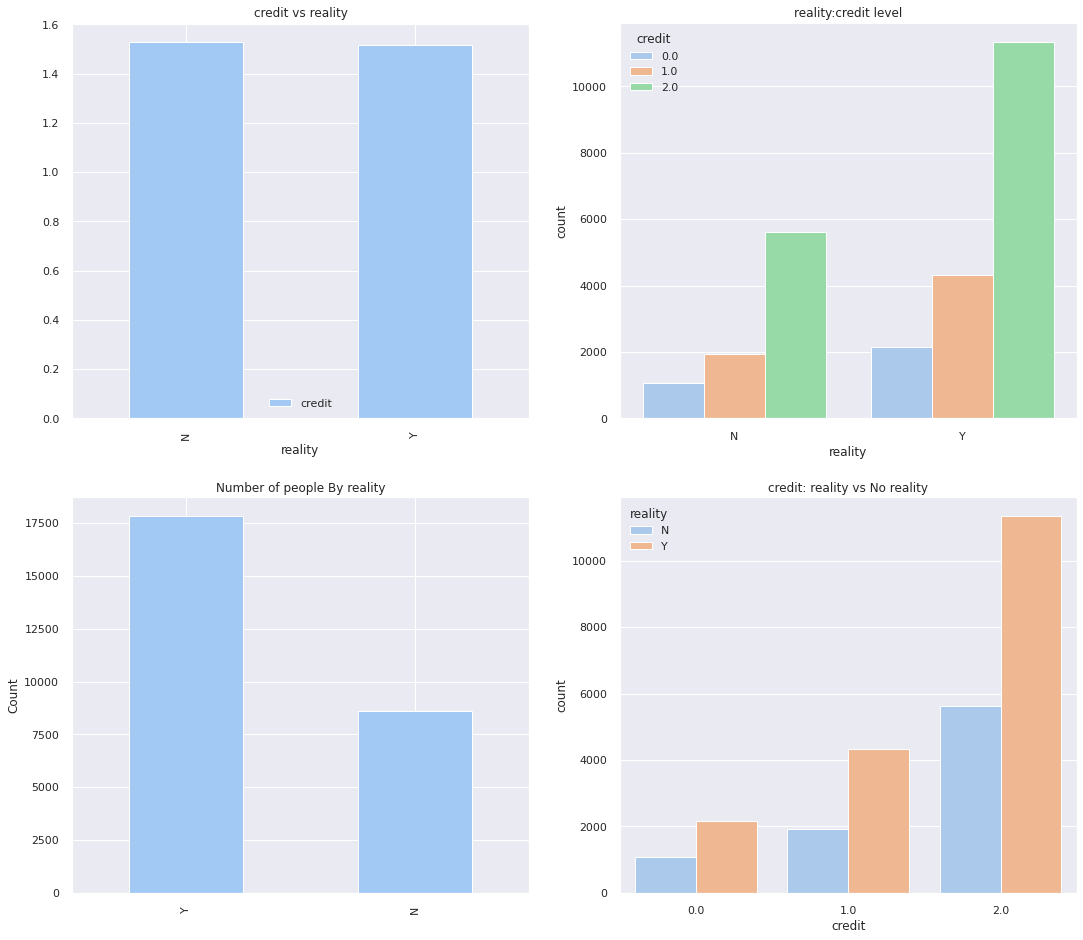

In [40]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('reality:credit level')
data['reality'].value_counts().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Number of people By reality')
ax[1, 0].set_ylabel('Count')
sns.countplot('credit',hue='reality',data=data,ax=ax[1, 1])
ax[1, 1].set_title('credit: reality vs No reality')
plt.show()

In [41]:
train = pd.read_csv('/content/drive/MyDrive/DuSiData/credit_card/train.csv', index_col='index')
train_y = train['credit'].astype(int)

Text(0.5, 1.0, 'email')

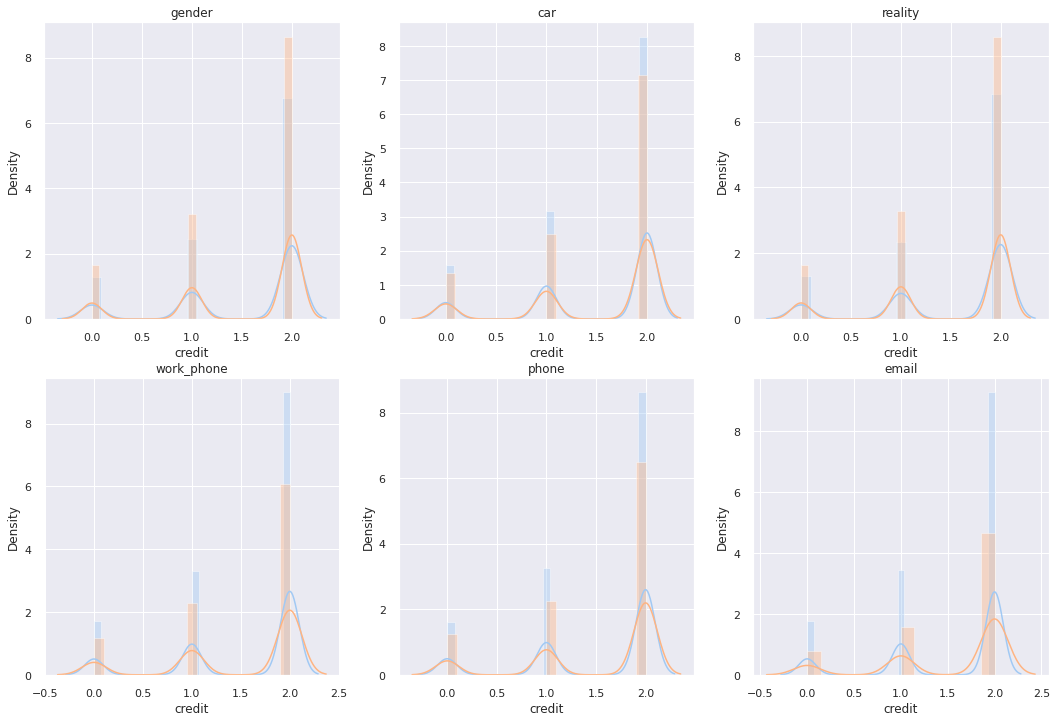

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(18,12))

sns.distplot(train_y[train['gender']=='M'], ax=axes[0, 0])
sns.distplot(train_y[train['gender']=='F'], ax=axes[0, 0])

sns.distplot(train_y[train['car']=='N'], ax=axes[0, 1])
sns.distplot(train_y[train['car']=='Y'], ax=axes[0, 1])

sns.distplot(train_y[train['reality']=='N'], ax=axes[0, 2])
sns.distplot(train_y[train['reality']=='Y'], ax=axes[0, 2])

axes[0, 0].set_title('gender')
axes[0, 1].set_title('car')
axes[0, 2].set_title('reality')

sns.distplot(train_y[train['work_phone']==0], ax=axes[1, 0])
sns.distplot(train_y[train['work_phone']==1], ax=axes[1, 0])

sns.distplot(train_y[train['phone']==0], ax=axes[1, 1])
sns.distplot(train_y[train['phone']==1], ax=axes[1, 1])

sns.distplot(train_y[train['email']==0], ax=axes[1, 2])
sns.distplot(train_y[train['email']==1], ax=axes[1, 2])

axes[1, 0].set_title('work_phone')
axes[1, 1].set_title('phone')
axes[1, 2].set_title('email')

Text(0.5, 1.0, "Raw Price's distribution")

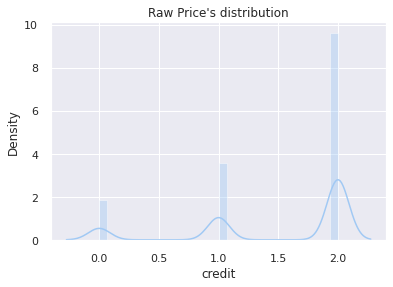

In [43]:
sns.distplot(data['credit'])
plt.title('Raw Price\'s distribution')

['credit' 'begin_month' 'DAYS_BIRTH' 'DAYS_EMPLOYED' 'email'
 'income_total' 'family_size' 'index' 'phone' 'work_phone']


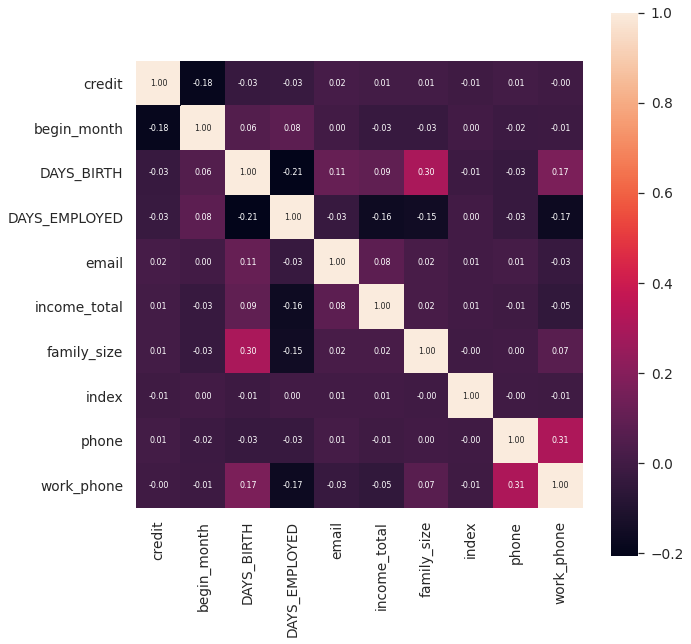

In [44]:
import scipy as sp

cor_abs = abs(data.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='credit').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)